<a href="https://colab.research.google.com/github/BiancaFormiga/Python-JS-BigData/blob/Aula-01/KMeans_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df_cartao = pd.read_csv("creditcard.csv")
df_cartao.head()

#Elimina as colunas e valores com itens nulos no DataFrame
df_cartao.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
X = df_cartao.iloc[:,1:28].values
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.28539358e-01, -1.89114844e-01,  1.33558377e-01],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.67170404e-01,  1.25894532e-01, -8.98309914e-03],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -3.27641834e-01, -1.39096572e-01, -5.53527940e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         2.65745453e-01, -8.73705959e-02,  4.45477214e-03],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
        -5.69158864e-01,  5.46668462e-01,  1.08820735e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -4.73648704e-01, -8.18267121e-01, -2.41530880e-03]])

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters = 2, init = 'random')

In [24]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=2)

In [25]:
kmeans.cluster_centers_

array([[-1.30932047e+00,  4.85015684e-01,  4.28415191e-01,
        -2.36887012e-01,  2.72491480e-01,  3.12360929e-02,
         2.57915508e-01, -2.71134470e-03, -1.78903744e-01,
        -1.36148881e-01, -7.77963950e-02, -8.14498212e-02,
        -1.22748508e-02, -2.08648393e-02, -6.59523260e-02,
        -3.30276407e-02,  1.09599873e-02,  5.24957822e-02,
         6.32244544e-02,  1.60060900e-02,  2.15756581e-02,
         6.55504023e-02,  4.69575756e-03, -8.12685284e-04,
        -1.10029484e-01, -9.27733475e-03,  1.46125075e-02],
       [ 1.45924511e+00, -5.40552738e-01, -4.77471167e-01,
         2.64011922e-01, -3.03693304e-01, -3.48128031e-02,
        -2.87448300e-01,  3.02180908e-03,  1.99389240e-01,
         1.51738702e-01,  8.67045247e-02,  9.07762889e-02,
         1.36803910e-02,  2.32539821e-02,  7.35042424e-02,
         3.68094933e-02, -1.22149682e-02, -5.85068479e-02,
        -7.04640140e-02, -1.78388783e-02, -2.40461937e-02,
        -7.30562962e-02, -5.23344851e-03,  9.05742371e-

In [26]:
distance = kmeans.fit_transform(X)
distance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[4.88288115, 3.57213838],
       [2.49649323, 3.62025895],
       [6.66828328, 5.94709323],
       ...,
       [5.57793705, 6.67385001],
       [5.44297477, 5.01484876],
       [3.91374146, 2.78836514]])

In [27]:
labels = kmeans.labels_
labels

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 8721583.68479505


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 7951985.956609211


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 7526636.941921036


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 7159689.394812213


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 6812453.937812289


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 6573827.602673071


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 6365039.304410126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 6151490.252039006


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 5940449.798556154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 5876029.282764444


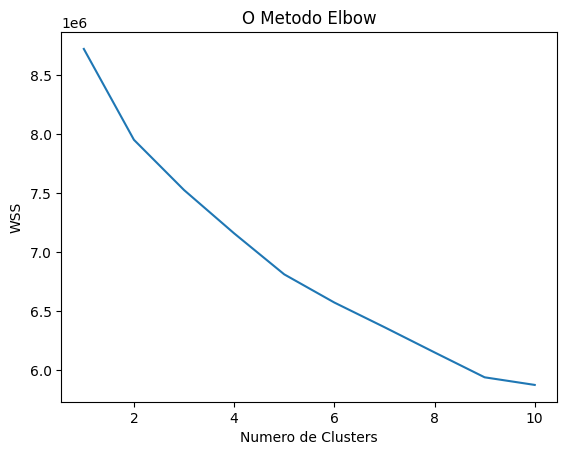

In [28]:
from sklearn.cluster import KMeans
wcss = []
i = 0
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()